### Loading Train_Data

In [1]:
import pandas as pd

train_data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\17. SVM\SVM_SalaryData_Train.csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


### Train Data Visualization

(<AxesSubplot:xlabel='education'>,
 Salary          <=50K   >50K
 education                   
  10th             761     59
  11th             989     59
  12th             348     29
  1st-4th          145      6
  5th-6th          276     12
  7th-8th          522     35
  9th              430     25
  Assoc-acdm       752    256
  Assoc-voc        963    344
  Bachelors       2918   2126
  Doctorate         95    280
  HS-grad         8223   1617
  Masters          709    918
  Preschool         45      0
  Prof-school      136    406
  Some-college    5341   1336)

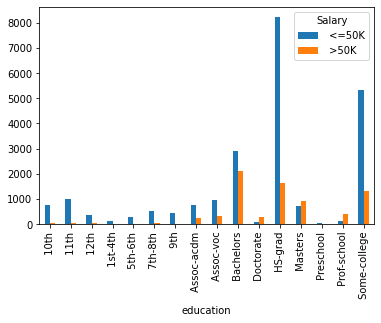

In [2]:
pd.crosstab(train_data.education,train_data.Salary).plot(kind='bar'),pd.crosstab(train_data.education,train_data.Salary)

(Salary              <=50K   >50K
 workclass                       
  Federal-gov          578    365
  Local-gov           1458    609
  Private            17409   4876
  Self-emp-inc         474    600
  Self-emp-not-inc    1785    714
  State-gov            935    344
  Without-pay           14      0,
 array([<AxesSubplot:title={'center':' <=50K'}, xlabel='workclass'>,
        <AxesSubplot:title={'center':' >50K'}, xlabel='workclass'>],
       dtype=object))

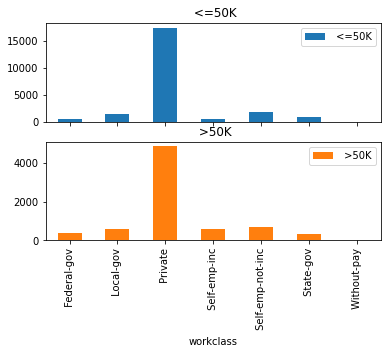

In [3]:
pd.crosstab(train_data.workclass,train_data.Salary),pd.crosstab(train_data.workclass,train_data.Salary).plot(kind='bar',subplots=True)

array([<AxesSubplot:ylabel=' <=50K'>, <AxesSubplot:ylabel=' >50K'>],
      dtype=object)

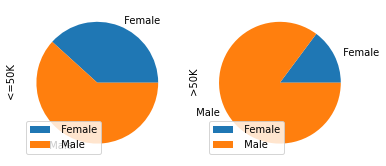

In [4]:
pd.crosstab(train_data.sex,train_data.Salary).plot(kind='pie',subplots=True)

<AxesSubplot:ylabel='Salary'>

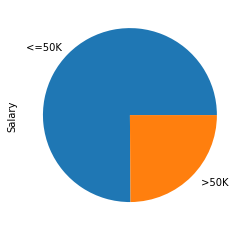

In [5]:
train_data.Salary.value_counts().plot(kind='pie')

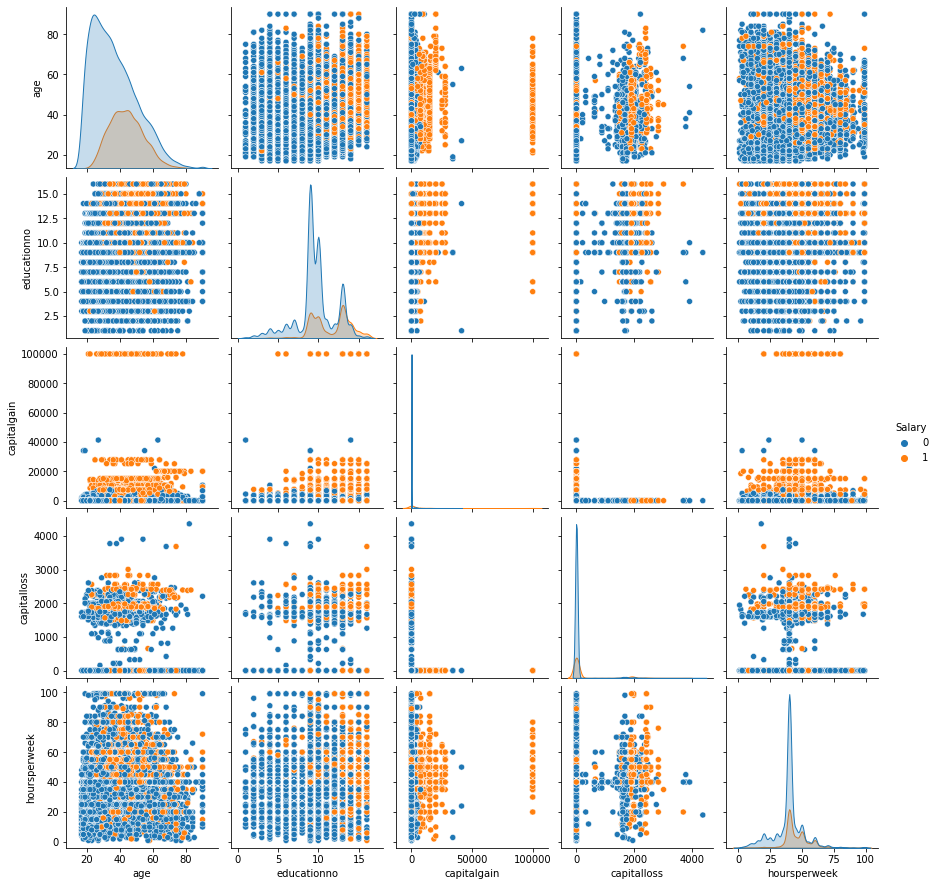

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(train_data,hue='Salary')
plt.show()

In [6]:
# Data types of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
# Label Encoding of the target
from sklearn.preprocessing import LabelEncoder

train_data['Salary'] = LabelEncoder().fit_transform(train_data['Salary'])
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [8]:
df = pd.get_dummies(train_data.iloc[:,:-1])
df

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# One Hot Encoding of the features and seggregating features and target
x = pd.get_dummies(train_data.iloc[:,:-1]).values
y = train_data['Salary'].values

In [10]:
# Feature Engineering
from sklearn.tree import DecisionTreeClassifier

# feature extraction
model = DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_)

[1.67067655e-01 1.26881302e-01 1.20208565e-01 4.17510267e-02
 9.74006379e-02 6.53106945e-03 9.71671371e-03 1.23393468e-02
 8.00463625e-03 1.13818657e-02 6.48199425e-03 0.00000000e+00
 3.77878392e-04 8.34565603e-04 3.68503291e-04 1.33287502e-04
 5.77875349e-04 6.44113894e-04 2.98535837e-04 2.94004920e-03
 2.32232305e-03 3.26261014e-03 7.95958619e-04 1.25629957e-03
 3.41281597e-03 0.00000000e+00 6.15609287e-04 3.83946606e-03
 2.57949354e-03 7.70003249e-04 2.15430160e-01 8.10503757e-04
 3.54121994e-03 1.31902330e-03 9.37658246e-04 5.20506910e-03
 0.00000000e+00 7.38012068e-03 1.06174399e-02 3.44310930e-03
 3.73208534e-03 4.51560129e-03 4.72395450e-03 0.00000000e+00
 9.86071438e-03 3.60835222e-03 9.87065865e-03 6.17828681e-03
 6.19249583e-03 2.87692037e-03 4.14452605e-03 1.20312698e-03
 1.81033404e-03 1.95203177e-03 6.32247391e-03 2.00402471e-03
 2.44173921e-03 5.61188110e-03 8.14161727e-04 6.52117615e-03
 5.12104013e-03 5.86817418e-03 6.00886484e-04 1.26823407e-03
 2.41779468e-04 1.156078

In [11]:
for i in range(0,101):
    if model.feature_importances_[i] > 0.006:
        print(i,model.feature_importances_[i] )

0 0.16706765499544704
1 0.1268813019879222
2 0.1202085647853031
3 0.041751026740154955
4 0.09740063793754332
5 0.006531069447327123
6 0.00971671370786526
7 0.012339346759977738
8 0.008004636247436261
9 0.011381865713746588
10 0.006481994247740229
30 0.21543015976772353
37 0.007380120679427761
38 0.010617439948381059
44 0.009860714382976761
46 0.009870658649078044
47 0.006178286806198855
48 0.00619249583183421
54 0.006322473905670648
59 0.006521176152513269
99 0.006919465428371179


In [12]:
X_train = pd.concat([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],df.iloc[:,4],df.iloc[:,5],df.iloc[:,6],\
                     df.iloc[:,7],df.iloc[:,8],df.iloc[:,9],df.iloc[:,10],df.iloc[:,30],df.iloc[:,37],df.iloc[:,38],\
                    df.iloc[:,44],df.iloc[:,46],df.iloc[:,47],df.iloc[:,48],df.iloc[:,59],df.iloc[:,99]],axis=1)
X_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,maritalstatus_ Married-civ-spouse,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Prof-specialty,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ White,native_ United-States
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,50,13,0,0,13,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1
2,38,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,53,7,0,0,40,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,28,13,0,0,40,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1
30157,40,9,0,0,40,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1
30158,58,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
30159,22,9,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [13]:
y_train = y

## Model

In [14]:
# Model 1
from sklearn.svm import SVC
T = SVC(kernel = 'rbf')
T.fit(X_train,y_train)

SVC()

In [15]:
# Model 2
U = SVC(kernel = 'poly')
U.fit(X_train,y_train)

SVC(kernel='poly')

In [16]:
# Model 3
V = SVC(kernel = 'sigmoid')
V.fit(X_train,y_train)

SVC(kernel='sigmoid')

### Loading Test_Data

In [17]:
test_data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\17. SVM\SVM_SalaryData_Test.csv')
test_data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


### Test Data Visualization

(Salary          <=50K   >50K
 education                   
  10th             380     23
  11th             541     30
  12th             186     14
  1st-4th           69      2
  5th-6th          151     10
  7th-8th          246     20
  9th              208     13
  Assoc-acdm       357    142
  Assoc-voc        492    160
  Bachelors       1474   1052
  Doctorate         50    119
  HS-grad         4144    799
  Masters          412    475
  Preschool         26      1
  Prof-school       57    186
  Some-college    2567    654,
 <AxesSubplot:xlabel='education'>)

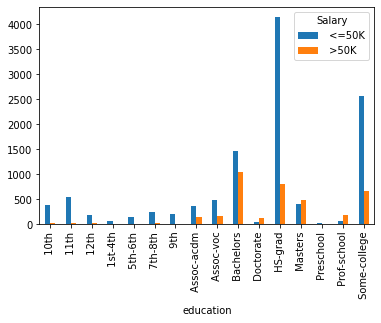

In [18]:
pd.crosstab(test_data.education,test_data.Salary),pd.crosstab(test_data.education,test_data.Salary).plot(kind='bar')

(Salary              <=50K   >50K
 workclass                       
  Federal-gov          279    184
  Local-gov            727    306
  Private             8646   2375
  Self-emp-inc         260    312
  Self-emp-not-inc     952    345
  State-gov            491    176
  Without-pay            5      2,
 array([<AxesSubplot:title={'center':' <=50K'}, xlabel='workclass'>,
        <AxesSubplot:title={'center':' >50K'}, xlabel='workclass'>],
       dtype=object))

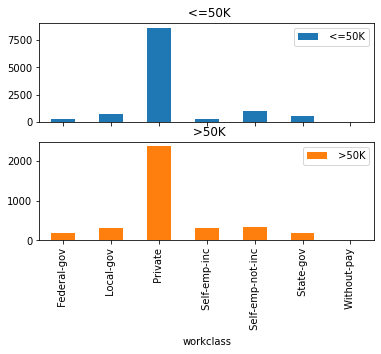

In [19]:
pd.crosstab(test_data.workclass,test_data.Salary), pd.crosstab(test_data.workclass,test_data.Salary).plot(kind='bar',subplots=True)

array([<AxesSubplot:ylabel=' <=50K'>, <AxesSubplot:ylabel=' >50K'>],
      dtype=object)

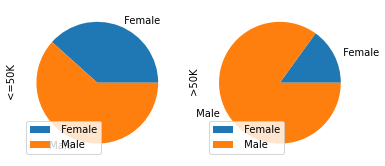

In [20]:
pd.crosstab(test_data.sex,test_data.Salary).plot(kind='pie',subplots=True)

<AxesSubplot:ylabel='Salary'>

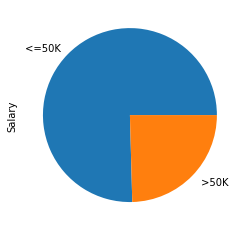

In [21]:
test_data.Salary.value_counts().plot(kind='pie')

In [22]:
test_data['Salary'] = LabelEncoder().fit_transform(test_data['Salary'])
x_test_data = pd.get_dummies(test_data.iloc[:,:-1])
x_test_data

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
X_test = pd.concat([x_test_data.iloc[:,0],x_test_data.iloc[:,1],x_test_data.iloc[:,2],x_test_data.iloc[:,3],\
                    x_test_data.iloc[:,4],x_test_data.iloc[:,5],x_test_data.iloc[:,6],x_test_data.iloc[:,7],\
                    x_test_data.iloc[:,8],x_test_data.iloc[:,9],x_test_data.iloc[:,10],x_test_data.iloc[:,30],\
                    x_test_data.iloc[:,37],x_test_data.iloc[:,38],x_test_data.iloc[:,42],x_test_data.iloc[:,44],\
                    x_test_data.iloc[:,46],x_test_data.iloc[:,47],x_test_data.iloc[:,59],x_test_data.iloc[:,99]], axis=1)
y_test = test_data['Salary'].values

## Testing the model with test_data

In [24]:
# Testing Model 1
y_pred = T.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10997   363]
 [ 2703   997]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [25]:
# Testing Model 2
y_pred = U.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11356     4]
 [ 3316   384]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     11360
           1       0.99      0.10      0.19      3700

    accuracy                           0.78     15060
   macro avg       0.88      0.55      0.53     15060
weighted avg       0.83      0.78      0.70     15060



In [26]:
# Testing Model 3
y_pred = V.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10553   807]
 [ 2856   844]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     11360
           1       0.51      0.23      0.32      3700

    accuracy                           0.76     15060
   macro avg       0.65      0.58      0.58     15060
weighted avg       0.72      0.76      0.72     15060

